In [224]:
import numpy as np
from scipy.stats import norm #нормальний розподіл 
from scipy.stats import t #розподіл Стьюдента
from scipy.stats import chi2 #розподіл Хі-квадрат
from scipy.stats import expon #експоненційний розподіл 
from scipy.stats import uniform #рівномірний розподіл
import math
import itertools
from scipy import random
# from decimal import *
import gmpy2
from gmpy2 import mpfr

# Завдання 1

In [59]:
gamma = 0.01
Z_gamma = 2.575

n1 = 100
n2 = 10000
n3 = 1000000

def gen_norm_values(n):
    vals = norm.rvs(size = n)
    X = np.sum(vals) / n  #вибіркове середнє
    S = np.sum([(i - X)**2 for i in vals]) / n #вибіркова дисперсія
    return X, S    

A. Побудувати довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., які мають нормальний розподіл, але дисперсія невідома.

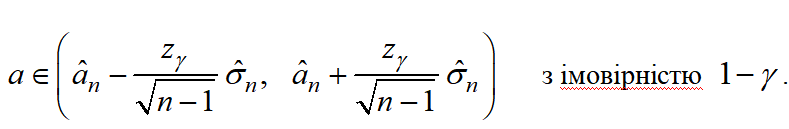

In [56]:
def interval_for_expected_value_1(n): #довірчий інтервал для матсподівання при невідомій дисперсії
    X, S = gen_norm_values(n)
    df = n-1 #ступенів свободи розподілу Стьюдента
    Z_gamma = t.ppf((1+gamma)/2, df, loc=0, scale=1)
    print("Z_gamma=", Z_gamma)
    left = X - (Z_gamma * math.sqrt(S)) / math.sqrt(n-1)
    right = X + (Z_gamma * math.sqrt(S)) / math.sqrt(n-1)
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"a належить ({left}, {right}) з імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_1(n1)
interval_2 = interval_for_expected_value_1(n2)
interval_3 = interval_for_expected_value_1(n3)

Z_gamma= 0.012565164145454548
кількість спостережень = 100
вибіркове середнє = 0.06712911961648542
вибіркова дисперсія 1.0594749609965999
a належить (0.0658292615974881, 0.06842897763548274) з імовірністю 0.99
довжина довірчого інтервалу = 0.002599716037994637

Z_gamma= 0.012533782929290459
кількість спостережень = 10000
вибіркове середнє = -0.0022315504505620587
вибіркова дисперсія 0.9916991890165191
a належить (-0.002356373234305004, -0.0021067276668191135) з імовірністю 0.99
довжина довірчого інтервалу = 0.00024964556748589047

Z_gamma= 0.01253347264193246
кількість спостережень = 1000000
вибіркове середнє = -0.0001602461384336327
вибіркова дисперсія 0.9992349741640113
a належить (-0.00017277482220744023, -0.00014771745465982518) з імовірністю 0.99
довжина довірчого інтервалу = 2.5057367547615052e-05



B. Побудувати довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., розподіл яких невідомий.
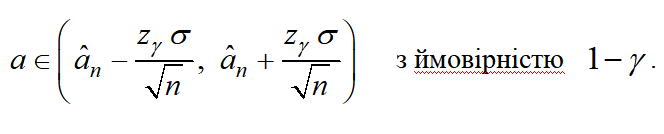

замість дисперсії використали її незміщену оцінку: 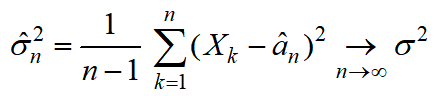

In [66]:
def interval_for_expected_value_2(n): #довірчий інтервал для матсподівання при невідомому розподілі
    X, S = gen_norm_values(n1)
    S = (S * n) / (n-1)
    left = X - (Z_gamma * math.sqrt(S)) / math.sqrt(n)
    right = X + (Z_gamma * math.sqrt(S)) / math.sqrt(n)
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"a належить ({left}, {right}) з імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_2(n1)
interval_2 = interval_for_expected_value_2(n2)
interval_3 = interval_for_expected_value_2(n3)

кількість спостережень = 100
вибіркове середнє = 0.04104808766226841
вибіркова дисперсія 1.1193578558345907
a належить (-0.23138616464171835, 0.3134823399662552) з імовірністю 0.99
довжина довірчого інтервалу = 0.5448685046079735

кількість спостережень = 10000
вибіркове середнє = -0.09899816500722107
вибіркова дисперсія 1.005316537666076
a належить (-0.12481652469090765, -0.07317980532353449) з імовірністю 0.99
довжина довірчого інтервалу = 0.05163671936737316

кількість спостережень = 1000000
вибіркове середнє = 0.24532068240243946
вибіркова дисперсія 1.0304182608807013
a належить (0.24270681226774415, 0.24793455253713476) з імовірністю 0.99
довжина довірчого інтервалу = 0.005227740269390602



C. Побудувати довірчий інтервал для дисперсії у припущенні, що
спостерігаються в.в., які мають нормальний розподіл.
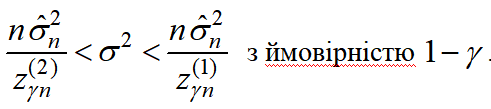

In [65]:
def interval_for_expected_value_3(n): #довірчий інтервал для дисперсії при нормальному розподілі
    X, S = gen_norm_values(n1)
    df = n-1 #ступенів свободи розподілу хі-квадрат
    Z1 = chi2.ppf((1-gamma)/2, df, loc=0, scale=1)
    Z2 = chi2.ppf((1+gamma)/2, df, loc=0, scale=1)
    print("Z1=", Z1, "Z2=", Z2)
    left = n * S / Z2 
    right = n * S / Z1 
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"дисперсія належить ({left}, {right}) з імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_3(n1)
interval_2 = interval_for_expected_value_3(n2)
interval_3 = interval_for_expected_value_3(n3)

Z1= 98.15857401686063 Z2= 98.50990999168656
кількість спостережень = 100
вибіркове середнє = -0.10666048741810434
вибіркова дисперсія 1.079488467188565
дисперсія належить (1.0958171287332057, 1.099739353388673) з імовірністю 0.99
довжина довірчого інтервалу = 0.003922224655467321

Z1= 9996.561103264923 Z2= 10000.105788656338
кількість спостережень = 10000
вибіркове середнє = -0.051129372734418865
вибіркова дисперсія 0.9709134872748102
дисперсія належить (0.9709032162201424, 0.9712474892567858) з імовірністю 0.99
довжина довірчого інтервалу = 0.0003442730366434166

Z1= 999980.608451331 Z2= 1000016.058424944
кількість спостережень = 1000000
вибіркове середнє = 0.0024389483323777666
вибіркова дисперсія 0.9666598015818281
дисперсія належить (0.9666442787972294, 0.9666785469759189) з імовірністю 0.99
довжина довірчого інтервалу = 3.426817868956711e-05



# Завдання 2

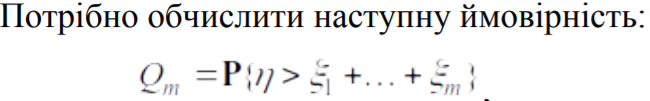


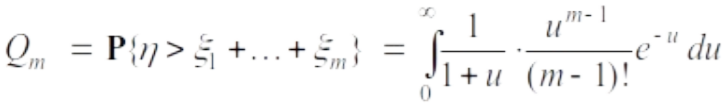


In [169]:
eps = 0.01
Z_gamma = 2.575

m = [1, 100, 1000, 10000]

In [158]:
def gen_expon_values(n):
    vals = expon.rvs(scale=1, size=n)
    return X, S

def gen_uniform_values(n):
    vals = uniform.rvs(size = n)
    return vals  

### B.  Стандартний метод Монте-Карло (метод 1)

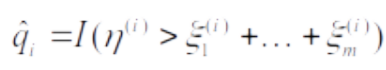

In [242]:
def MonteCarlo_method_1(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        un = gen_uniform_values(m)
        xi = (-1)* np.log(un)
        w = uniform.rvs()
        while w == 0.0: #якщо раптом згенерується w=0
            w = uniform.rvs()
        eta = (1/w) - 1
        if eta > np.sum(xi):
            q_i = 1
        else: q_i = 0
        sigma += q_i**2
        Q += q_i
    Q = Q/n
    sigma = (sigma - n*(Q**2)) / (n-1)
    n_bound = ((Z_gamma * sigma) / (eps * Q))**2
    return Q, sigma, n_bound

for m_i in m: 
    n = 80000
    Q, sigma, n_bound = MonteCarlo_method_1(m_i, n)
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("дисперсія=", sigma)
    print("n_bound=", n_bound)


m= 1
n= 80000
Q= 0.5954
дисперсія= 0.2409018512731409
n_bound= 10854.681405589092

m= 100
n= 80000
Q= 0.0102875
дисперсія= 0.010181794616182703
n_bound= 64950.640028665686

m= 1000
n= 80000
Q= 0.0010375
дисперсія= 0.001036436549206865
n_bound= 66170.39015312663

m= 10000
n= 80000
Q= 8.75e-05
дисперсія= 8.749343741796773e-05
n_bound= 66296.30431115623


### C (Метод 2)
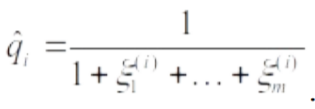

In [243]:
def MonteCarlo_method_2(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        un = gen_uniform_values(m)
        xi = (-1)* np.log(un)
        q_i = 1 / (np.sum(xi) + 1)
        sigma += q_i**2
        Q += q_i
    Q = Q/n
    sigma = (sigma - n*(Q**2)) / (n-1)
    n_bound = ((Z_gamma * sigma) / (eps * Q))**2
    return Q, sigma, n_bound

for m_i in m: 
    n = 10000
    Q, sigma, n_bound = MonteCarlo_method_2(m_i, n)
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("дисперсія=", sigma)
    print("n_bound=", n_bound)


m= 1
n= 10000
Q= 0.5981306984309801
дисперсія= 0.04741258977958438
n_bound= 416.62913549742746

m= 100
n= 10000
Q= 0.009989263920431899
дисперсія= 9.970795088026185e-07
n_bound= 0.0006606129362136093

m= 1000
n= 10000
Q= 0.0010002093748117287
дисперсія= 9.942315897422024e-10
n_bound= 6.551605531020435e-08

m= 10000
n= 10000
Q= 9.999342423944764e-05
дисперсія= 1.0016903877461104e-12
n_bound= 6.653935665898504e-12


### D (Метод 3)
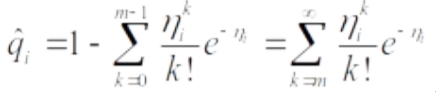

In [244]:
def MonteCarlo_method_3(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        w = uniform.rvs()
        while w == 0.0: #якщо раптом згенерується w=0
            w = uniform.rvs()
        eta_i = (1/w) - 1
        ex = math.exp(-eta_i)
        sum = 0.000000
        b = 1
        for k in range(1, m):
            b = gmpy2.mul(gmpy2.div(b, k), eta_i)
            sum += b
######################### якщо брати формулу від m до нескінченності то треба ще ця частина ##############           
#         k = m
#         while sum * ex < 0.001:
#             sum = gmpy2.mul(gmpy2.div(sum, k), eta_i)
#             k += 1
#         q_i = sum * ex
####################################################################################################
        q_i = 1 - sum * ex
        sigma += q_i**2
        Q += q_i
    Q = Q/n
    sigma = (sigma - n*(Q**2)) / (n-1)
    n_bound = ((Z_gamma * sigma) / (eps * Q))**2
    return Q, sigma, n_bound

for m_i in m: 
    n = 10000
    Q, sigma, n_bound = MonteCarlo_method_3(m_i, n)
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("дисперсія=", sigma)
    print("n_bound=", n_bound)


m= 1
n= 10000
Q= 1.0
дисперсія= 0.0
n_bound= 0.0

m= 100
n= 10000
Q= 0.41873641566745956
дисперсія= 0.11657149683972107
n_bound= 5138.7530845382953

m= 1000
n= 10000
Q= 0.40547250703185062
дисперсія= 0.11429338434014549
n_bound= 5268.3403967087761

m= 10000
n= 10000
Q= 0.40345641188213588
дисперсія= 0.11502279223182552
n_bound= 5389.2587470095523


### E Метод 4 (випадок, коли m>1)
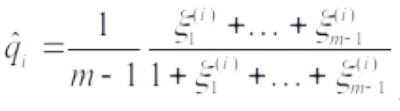

In [245]:
def MonteCarlo_method_4(m, n):
    Q = 0
    sigma = 0
    for i in range(n):
        un = gen_uniform_values(m-1)
        xi = (-1)* np.log(un)
        s_xi = np.sum(xi)
        q_i = s_xi / ((m-1)*(1+s_xi))
        sigma += q_i**2
        Q += q_i
    Q = Q/n
    sigma = (sigma - n*(Q**2)) / (n-1)
    n_bound = ((Z_gamma * sigma) / (eps * Q))**2
    return Q, sigma, n_bound


for m_i in m[1:]: 
    n = 10000
    Q, sigma, n_bound = MonteCarlo_method_4(m_i, n)
    print("\nm=", m_i)
    print("n=", n)
    print("Q=", Q)
    print("дисперсія=", sigma)
    print("n_bound=", n_bound)


m= 100
n= 10000
Q= 0.009999177430815234
дисперсія= 1.0441299866585672e-10
n_bound= 7.2299460114158655e-12

m= 1000
n= 10000
Q= 0.0009999986344997934
дисперсія= 1.012393746138104e-15
n_bound= 6.796018622668332e-20

m= 10000
n= 10000
Q= 9.999999823724025e-05
дисперсія= 1.0211495108893127e-20
n_bound= 6.914060085607047e-28


In [101]:
###### функция для интеграла(A), но пайтон с ней умирает
# def f(x, m, n):
#     t = math.tan(x)
#     return (1/n)*( math.exp(-pow(t,2))/(1+pow(t,2)) ) * ( pow(t, 2*(m-1)) / math.factorial(m-1)) * ( 4*t / (1+math.cos(2*x)))

# def MonteCarlo_method_1(m, n):
#     a = - math.pi / 2
#     b = math.pi / 2
#     n = 1000
    
#     ar = np.zeros(n)
    
#     for i in range (len(ar)):
#         ar[i] = random.uniform(a,b)
    
#     integral = 0.0 
    
#     for i in ar:
#         integral += f(i, m, n)
        
#     ans = (b-a)*integral
    
#     return ans

# Qm = MonteCarlo(1)
# print("Qm=", Qm)